In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

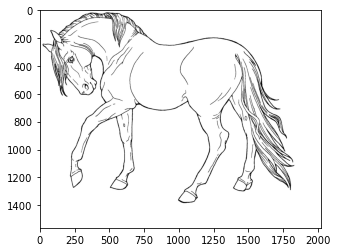

In [4]:
img_horse = cv2.imread('Assignment/kiMKo5eyT.jpg')
plt.imshow(img_horse)

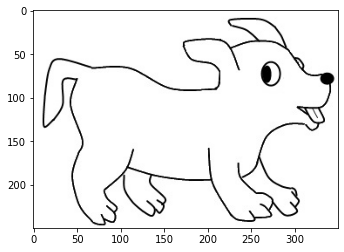

In [5]:
img_dog = cv2.imread('Assignment/kiKox5ErT.jpg')
plt.imshow(img_dog)

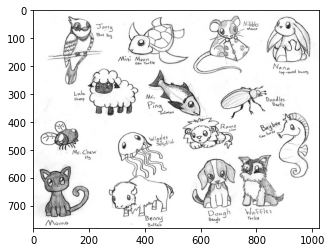

In [6]:
img_multi=cv2.imread('Assignment/6Tp5bXg6c.jpg')
plt.imshow(img_multi)

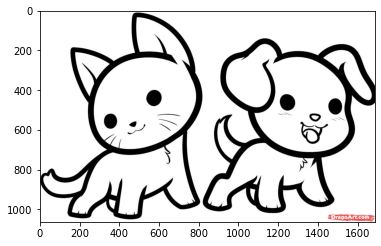

In [7]:
img_cats= cv2.imread("Assignment/Aibrg4jGT.jpg")
plt.imshow(img_cats)


def draw_Contours(img):
    bw=process_image(img)
    #cv2.CHAIN_APPROX_SIMPLE
    (cnts, _) = cv2.findContours(bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours=sorted(cnts, key=cv2.contourArea, reverse=True)
    num_contours = len(contours)
    # num_draw = min(num_contours,20) #not show too many objects
    img2=img.copy()
    
    
    for layer in range(num_contours):
        c = contours[layer]
        # compute the rotated bounding box of the largest contour
        rect = cv2.minAreaRect(c)
        box = np.int0(cv2.boxPoints(rect))
        # draw a bounding box arounded the detected barcode、
        cv2.drawContours(img2, [box], -1, (0, 255, 0), 3)
        #cv2.drawContours(img2, c, -1, (0, 255, 0), 3)
    return img2
    


In [85]:
def process_image(img):
    # gray scale
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # black/white scale
    ret, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return bw
    
 #   gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
 #   gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

    # subtract the y-gradient from the x-gradient
 #   gradient = cv2.subtract(gradX, gradY)
 #   gradient = cv2.convertScaleAbs(gradient)
    

In [100]:
def draw_Contours(img):
    #precoss image 
    bw=process_image(img)
    #find contours in the image
    (cnts, hierarchy) = cv2.findContours(bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #rank contours according to its area
    contours=sorted(cnts, key=cv2.contourArea, reverse=True)
    
    img2=img.copy()
    # find the smallest rectangle for each contour
    rect=[cv2.minAreaRect(c) for c in contours]
    # get corresponding coordinates
    box = [np.int0(cv2.boxPoints(r)) for r in rect]
    cv2.drawContours(image=img2, 
                     contours=box, 
                     contourIdx=-1, 
                     color=(0, 255, 0), 
                     thickness=5,
                     hierarchy=hierarchy,
                     maxLevel = 1)
    
    return img2


True

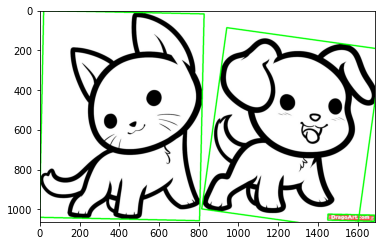

In [101]:
img=draw_Contours(img_cats)
plt.imshow(img)
cv2.imwrite("examples/cat.jpg",img)

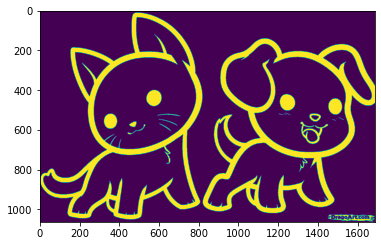

In [102]:
plt.imshow(process_image(img_cats))

True

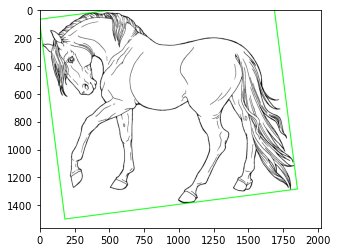

In [103]:
img=draw_Contours(img_horse)
plt.imshow(img)
cv2.imwrite("examples/horse.jpg",img)

True

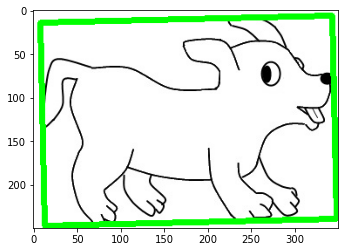

In [104]:
img=draw_Contours(img_dog)
plt.imshow(img)
cv2.imwrite("examples/dog.jpg",img)

True

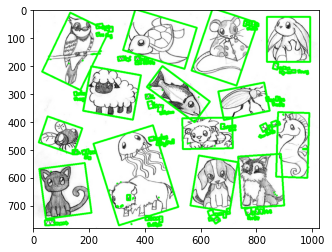

In [105]:
img=draw_Contours(img_multi)
plt.imshow(img)
cv2.imwrite("examples/multi.jpg",img)